In [1]:
import ipywidgets as widgets
import sys
from pathlib import Path
import os
import importlib


module_path='preprocessing/day_intervals_preproc'
if module_path not in sys.path:
    sys.path.append(module_path)

module_path='utils'
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path='preprocessing/hosp_module_preproc'
if module_path not in sys.path:
    sys.path.append(module_path)
    
module_path='model'
if module_path not in sys.path:
    sys.path.append(module_path)
#print(sys.path)
root_dir = os.path.dirname(os.path.abspath('UserInterface.ipynb'))
data_dir = '/datasets/MIMIC-IV/physionet.org/files'
import day_intervals_cohort
from day_intervals_cohort import *

import day_intervals_cohort_v2
from day_intervals_cohort_v2 import *

import data_generation_icu

import data_generation
import evaluation

import feature_selection_hosp
from feature_selection_hosp import *

# import train
# from train import *


import ml_models
from ml_models import *

import dl_train
from dl_train import *

import tokenization
from tokenization import *


import behrt_train
from behrt_train import *

import feature_selection_icu
from feature_selection_icu import *
import fairness
import callibrate_output

/fs01/home/chloexq/.cache/pypoetry/virtualenvs/time-series-library-UC7OlRP4-py3.8/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [2]:
%load_ext autoreload
%autoreload 2

importlib.reload(day_intervals_cohort)
import day_intervals_cohort
from day_intervals_cohort import *

importlib.reload(day_intervals_cohort_v2)
import day_intervals_cohort_v2
from day_intervals_cohort_v2 import *

importlib.reload(data_generation_icu)
import data_generation_icu
importlib.reload(data_generation)
import data_generation

importlib.reload(feature_selection_hosp)
import feature_selection_hosp
from feature_selection_hosp import *

importlib.reload(feature_selection_icu)
import feature_selection_icu
from feature_selection_icu import *

importlib.reload(tokenization)
import tokenization
from tokenization import *

importlib.reload(ml_models)
import ml_models
from ml_models import *

importlib.reload(dl_train)
import dl_train
from dl_train import *

importlib.reload(behrt_train)
import behrt_train
from behrt_train import *

importlib.reload(fairness)
import fairness

importlib.reload(callibrate_output)
import callibrate_output

importlib.reload(evaluation)
import evaluation

# Welcome to your MIMIC-IV Project

This repository explains the steps to download and clean MIMIC-IV dataset for analysis.
The repository is compatible with MIMIC-IV v1.0 and MIMIC-IV v2.0

Please go to:
- https://physionet.org/content/mimiciv/1.0/ for v1.0
- https://physionet.org/content/mimiciv/2.0/ for v2.0

Follow instructions to get access to MIMIC-IV dataset.

Download the files using your terminal: 
- wget -r -N -c -np --user mehakg --ask-password https://physionet.org/files/mimiciv/1.0/ or
- wget -r -N -c -np --user mehakg --ask-password https://physionet.org/files/mimiciv/2.0/
        

Save downloaded files in the parent directory of this github repo. 

The structure should look like below for v1.0-
- mimiciv/1.0/core
- mimiciv/1.0/hosp
- mimiciv/1.0/icu

The structure should look like below for v2.0-
- mimiciv/2.0/hosp
- mimiciv/2.0/icu

In [3]:
importlib.reload(dl_train)
import dl_train
from dl_train import *

In [225]:
model_name = 'Time-series LSTM'
oversampling = True
cv = 0
data_icu = True
diag_flag = True
proc_flag = False
out_flag = False
chart_flag = True
med_flag = True
data_dir = '/datasets/MIMIC-IV'#'/scratch/ssd004/scratch/chloexq/data_demo/'

===============MODEL TRAINING===============
Total Samples 22354
Positive Samples 2653
=============OVERSAMPLING===============
Total Samples 39402
Positive Samples 19701
[ MODEL CREATED ]
LSTMBase(
  (med): ValEmbed(
    (codeEmbed): BatchNorm1d(78, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc): Linear(in_features=78, out_features=152, bias=True)
  )
  (chart): ValEmbed(
    (codeEmbed): BatchNorm1d(185, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (fc): Linear(in_features=185, out_features=152, bias=True)
  )
  (cond): StatEmbed(
    (codeEmbed): Embedding(1356, 52)
    (fc): Linear(in_features=70512, out_features=152, bias=True)
  )
  (ethEmbed): Embedding(34, 152, padding_idx=0)
  (genderEmbed): Embedding(3, 152, padding_idx=0)
  (ageEmbed): Embedding(74, 152, padding_idx=0)
  (insEmbed): Embedding(4, 152, padding_idx=0)
  (embedfc): Linear(in_features=1064, out_features=152, bias=True)
  (rnn): LSTM(152, 256, num_layers=2, batch_fi

PermissionError: [Errno 13] Permission denied: '/datasets/MIMIC-IV/data/output/outputDict'

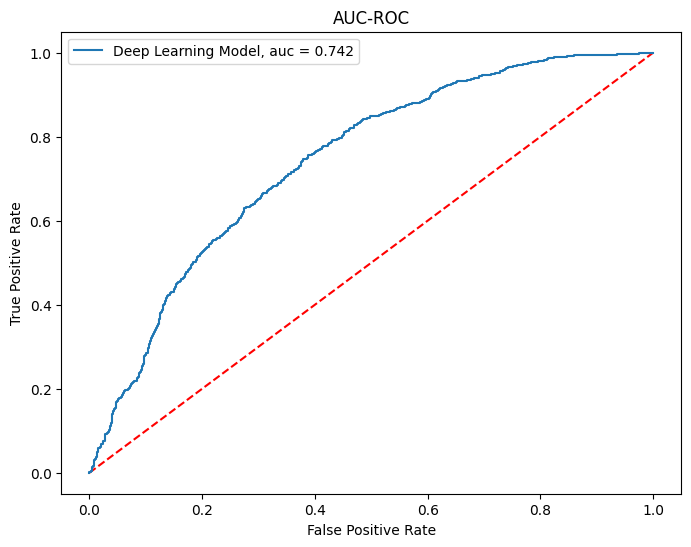

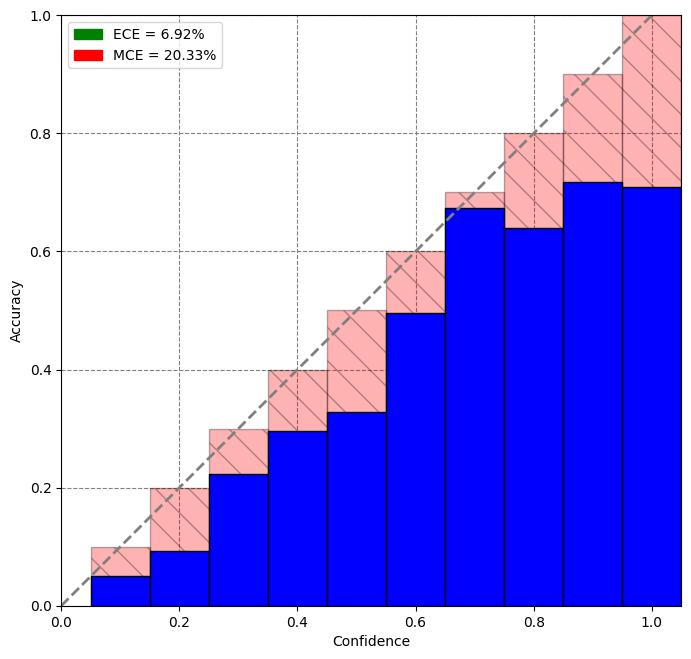

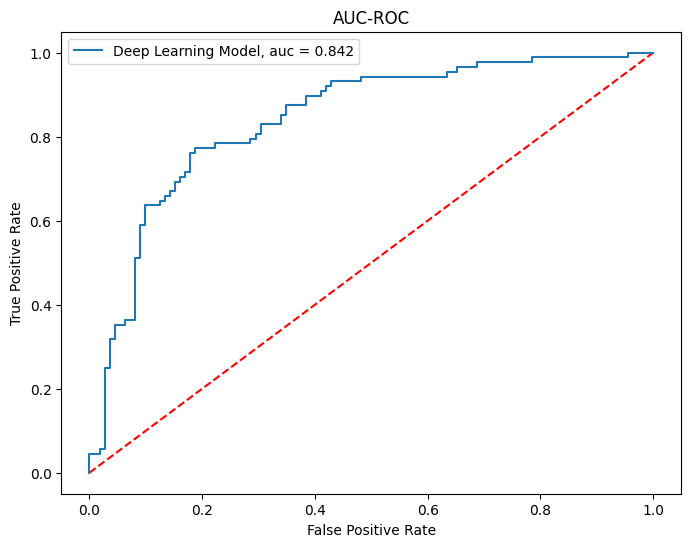

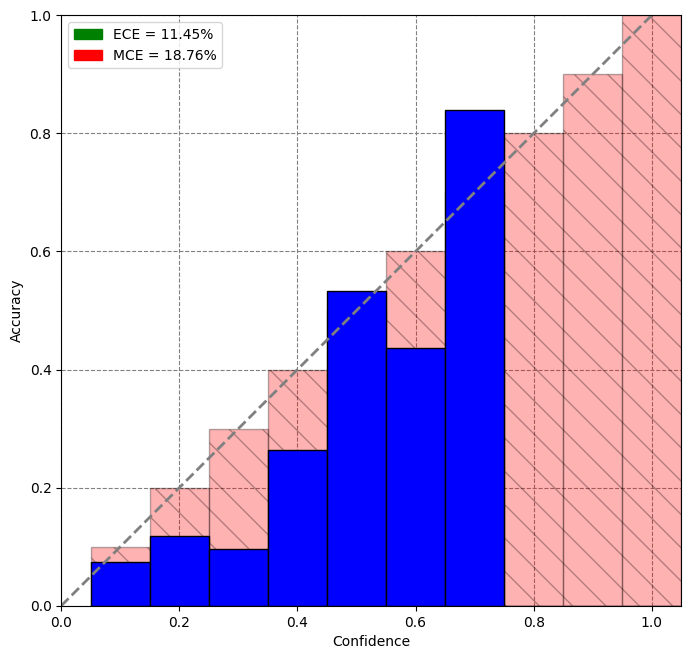

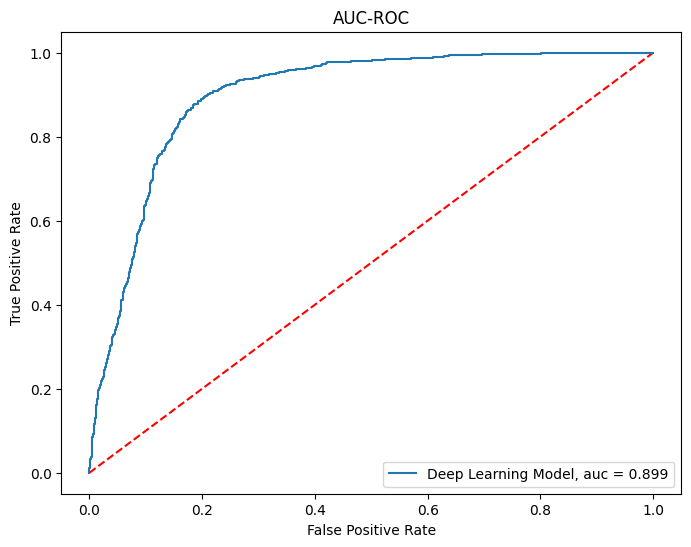

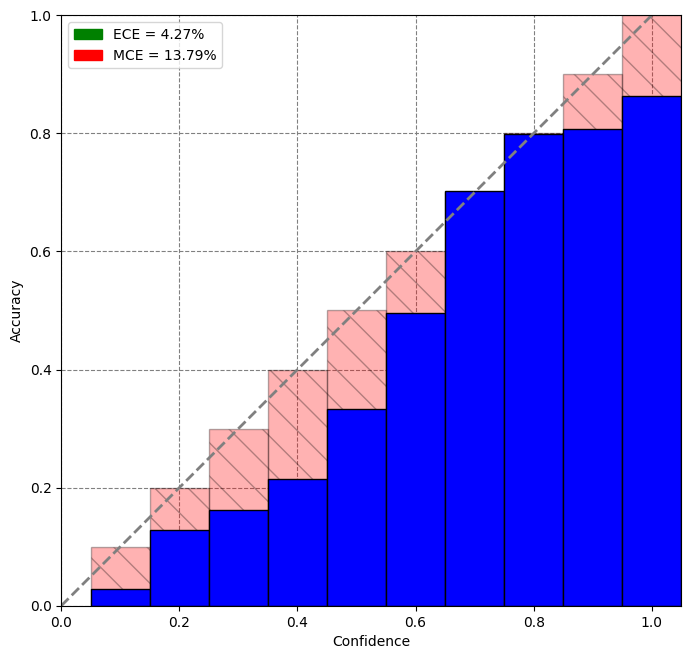

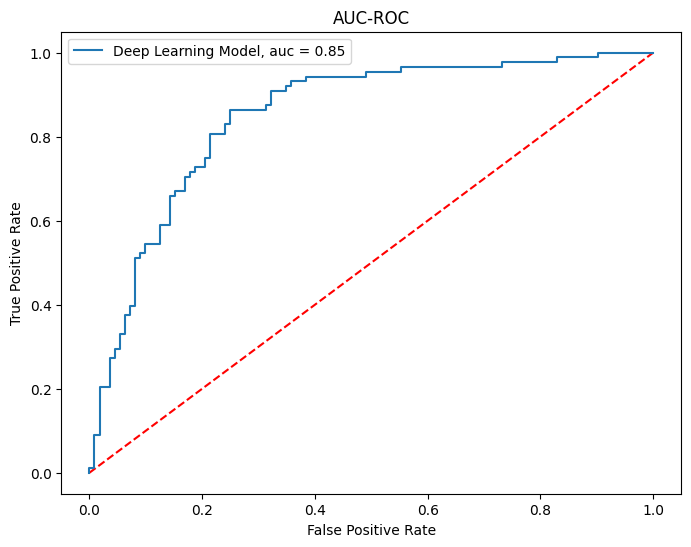

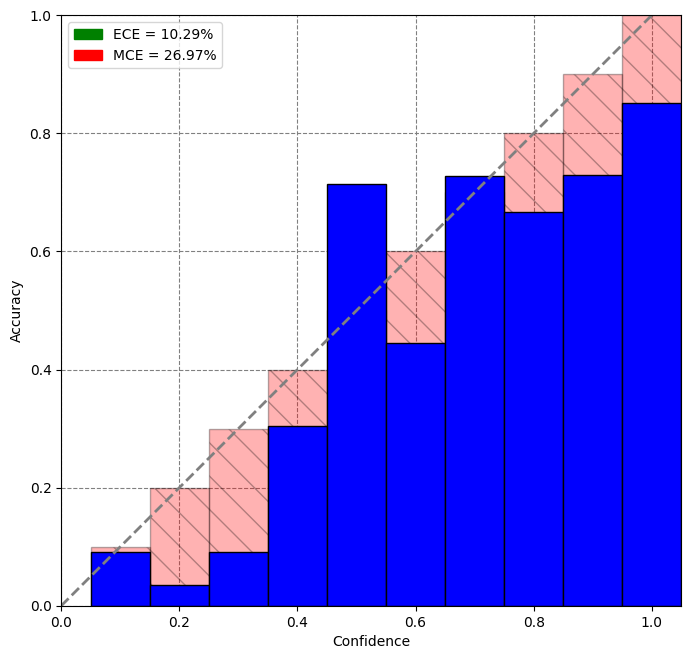

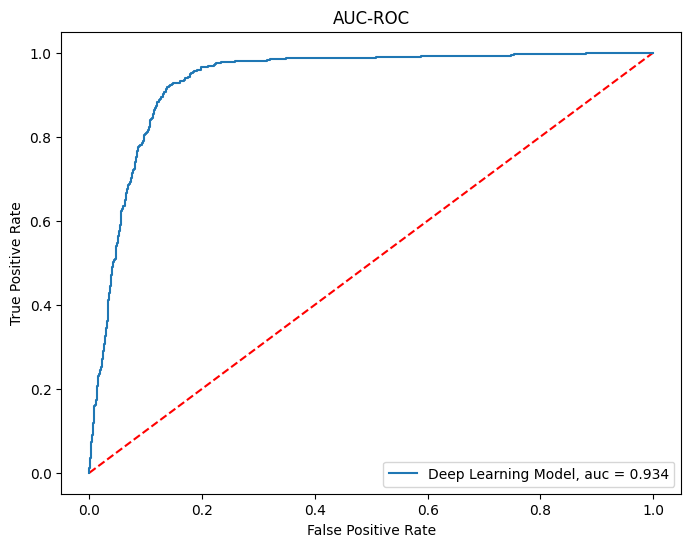

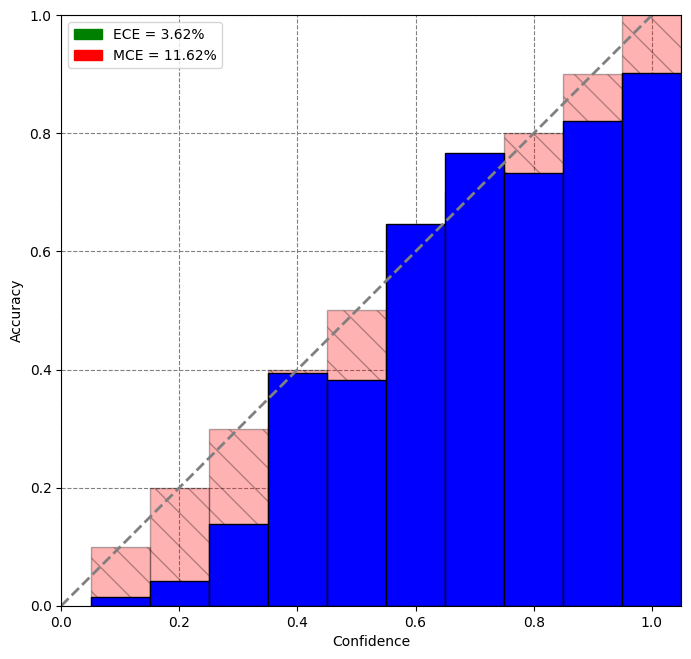

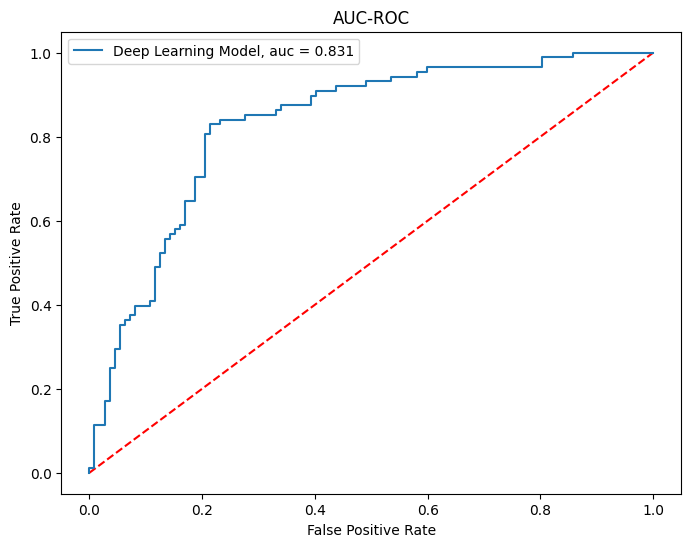

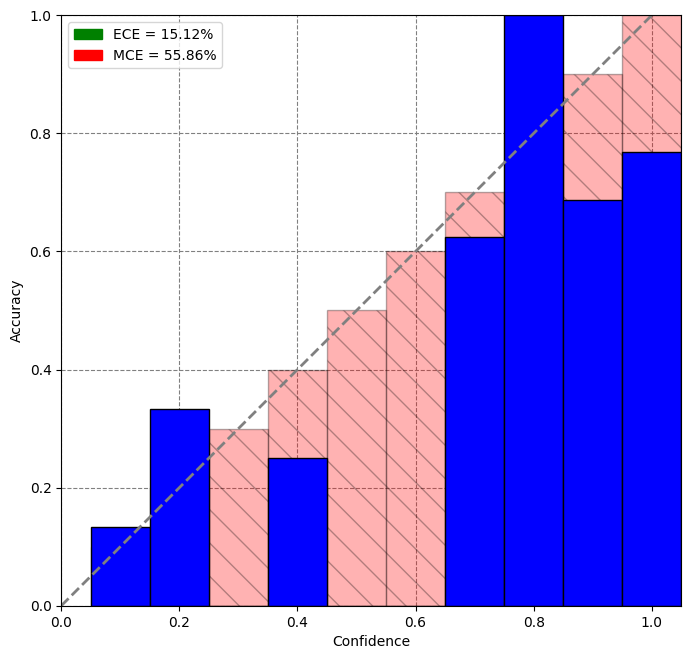

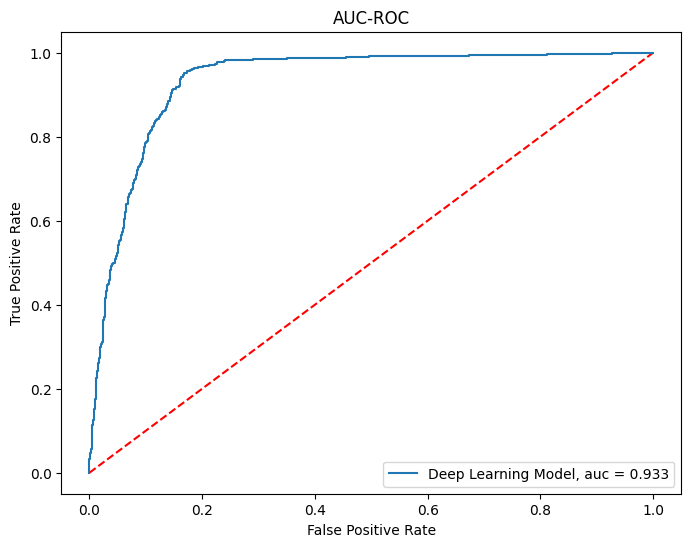

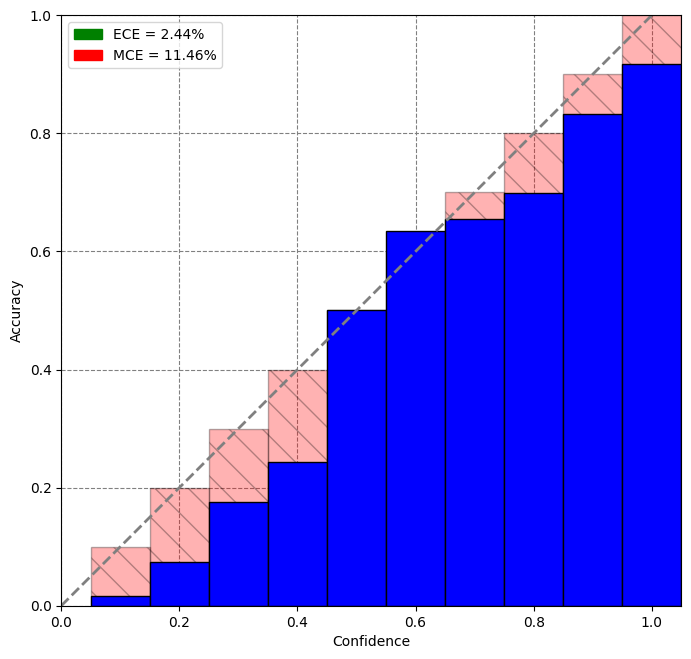

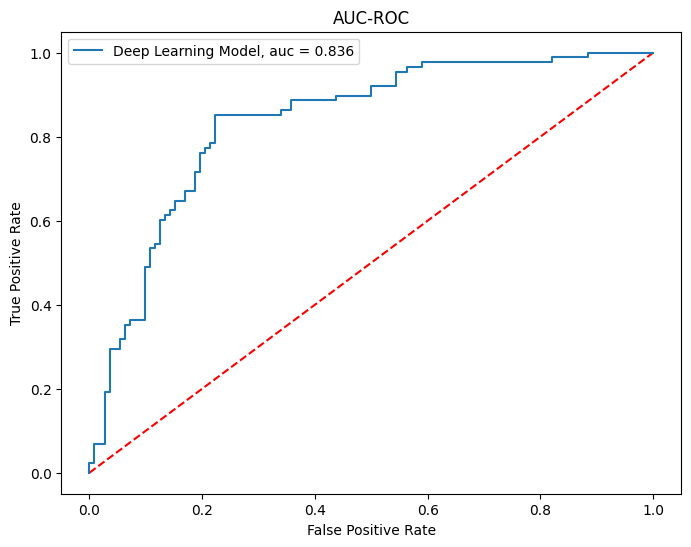

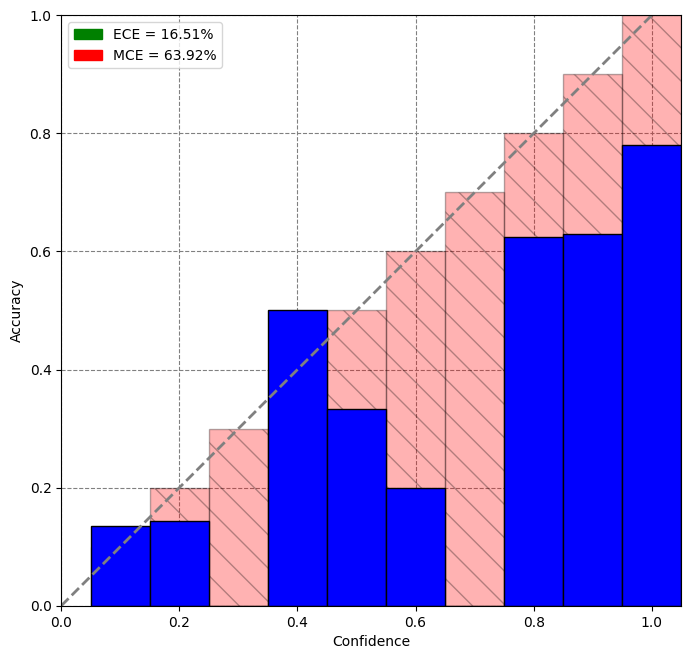

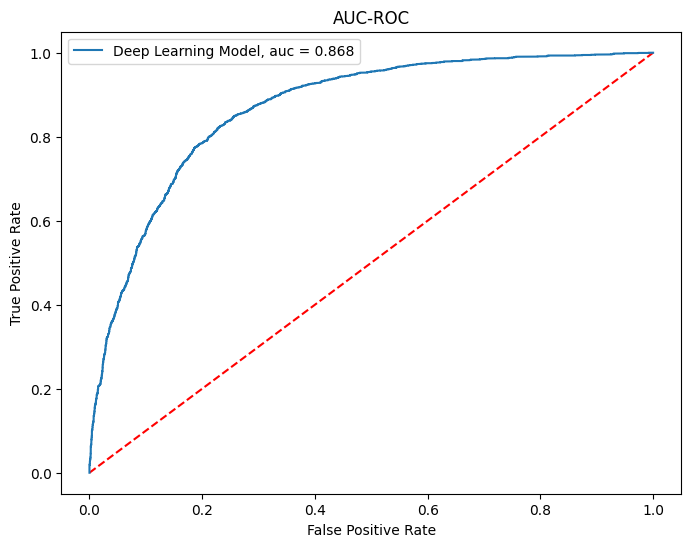

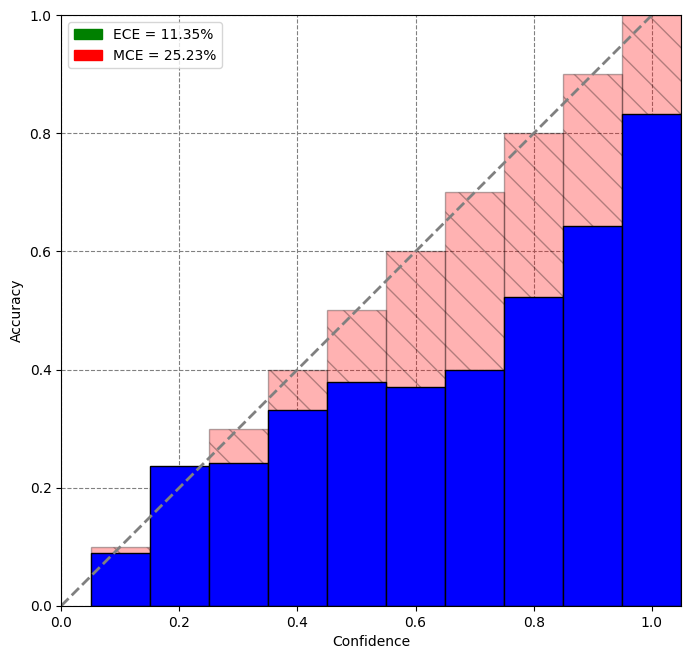

In [226]:
if data_icu:
    model=dl_train.DL_models(data_dir, data_icu,diag_flag,proc_flag,out_flag,chart_flag,med_flag,False,model_name,cv,oversampling,model_name='attn_icu_read',train=True)
else:
    model=dl_train.DL_models(data_dir, data_icu,diag_flag,proc_flag,False,False,med_flag,lab_flag,model_name,cv,oversampling,model_name='attn_icu_read',train=True)

## 10. Running BEHRT
Below we integrate the implementation of BEHRT in our pipeline.
We perform pre-procesing needed to run BEHRT model. https://github.com/deepmedicine/BEHRT

Few things to note before running BEHRT -
- The numerical values are binned into quantiles.
- BEHRT has recommended maximum number of events per sample to be 512. 
    So feature selection is important so that number of events per sample does not exceed 512.
- The model is quite computationally heavy so it requires a GPU.

The output files for BEHRT will be saved in ./data/behrt/ folder

**Please run below cell to to pre-process and run BEHRT on the selected cohort**

In [313]:
importlib.reload(tokenization)
import tokenization
from tokenization import *

In [314]:
data_icu = True
diag_flag = True
proc_flag = False
out_flag = False
chart_flag = True
med_flag = True

In [315]:
if data_icu:
    token=tokenization.BEHRT_models(data_icu,diag_flag,proc_flag,out_flag,chart_flag,med_flag,False)
    tokenized_src, tokenized_age, tokenized_gender, tokenized_ethni, tokenized_ins, tokenized_labels=token.tokenize()
else:
    token=tokenization.BEHRT_models(data_icu,diag_flag,proc_flag,False,False,med_flag,lab_flag)
    tokenized_src, tokenized_age, tokenized_gender, tokenized_ethni, tokenized_ins, tokenized_labels=token.tokenize()
    
behrt_train.train_behrt(tokenized_src, tokenized_age, tokenized_gender, tokenized_ethni, tokenized_ins, tokenized_labels)

STARTING READING FILES.


100%|██████████| 5000/5000 [14:30<00:00,  5.74it/s]


FINISHED READING FILES. 

STARTING TOKENIZATION.


100%|██████████| 5000/5000 [09:24<00:00,  8.85it/s]


FINISHED TOKENIZATION. 

FINAL COHORT STATISTICS: 
4 Positive samples.
213 Negative samples.

98 Female samples.
119 Male samples.

18 BLACK/AFRICAN AMERICAN samples.
156 WHITE samples.
9 UNKNOWN samples.
2 BLACK/CAPE VERDEAN samples.
0 WHITE - BRAZILIAN samples.
2 BLACK/AFRICAN samples.
1 HISPANIC OR LATINO samples.
7 OTHER samples.
0 UNABLE TO OBTAIN samples.
0 HISPANIC/LATINO - SALVADORAN samples.
5 WHITE - OTHER EUROPEAN samples.
3 BLACK/CARIBBEAN ISLAND samples.
1 ASIAN samples.
4 HISPANIC/LATINO - DOMINICAN samples.
1 HISPANIC/LATINO - PUERTO RICAN samples.
1 WHITE - RUSSIAN samples.
1 ASIAN - KOREAN samples.
2 ASIAN - CHINESE samples.
1 PATIENT DECLINED TO ANSWER samples.
0 WHITE - EASTERN EUROPEAN samples.
1 ASIAN - ASIAN INDIAN samples.
0 ASIAN - SOUTH EAST ASIAN samples.
0 NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER samples.
1 AMERICAN INDIAN/ALASKA NATIVE samples.
0 HISPANIC/LATINO - CENTRAL AMERICAN samples.
1 PORTUGUESE samples.
0 HISPANIC/LATINO - GUATEMALAN samples.
0 HISP

ValueError: cannot convert float NaN to integer

### EVALUATION AS STANDALONE MODULE
Below cell shows an exaple of how evaluation module can be used as a standalone module.

evaluation.Loss class can be instantiated and model output and ground truth can be passed to it to obtain results.

In the example below we captured model output and ground truth in a file and used that file to read the data.

In function definition ***loss(prob,truth,logits,False)***

prob -> List of Output predicted probabilities of case being positive

truth -> List of ground truth labels

logits -> List of logits obtained from last fully connected layer before applying softmax.sigmoid function in the model.

In [ ]:
if torch.cuda.is_available():
    device='cuda:0'
#device='cpu'
loss=evaluation.Loss(device,acc=True,ppv=True,sensi=True,tnr=True,npv=True,auroc=True,aurocPlot=True,auprc=True,auprcPlot=True,callb=True,callbPlot=True)
with open("./data/output/outputDict", 'rb') as fp:
    outputDict=pickle.load(fp)
prob=list(outputDict['Prob'])
truth=list(outputDict['Labels'])
logits=list(outputDict['Logits'])
#print(torch.tensor(prob))
print("======= TESTING ========")
loss(prob,truth,logits,train=False,standalone=True)


### 11. FAIRNESS EVALUATION
In train and testing step we save output files in **./data/output/** folder.

This file conatins list of demographic variables included in training and testing of the model.

It also contains the ground truth labels and predicted probability for each sample.

We use the above saved data to perform fairness evaluation of the results obtained from model testing.

This module can be used as stand-alone module also.

Please create a file that contains predicted probabilites form the last sigmoid layer in column named **Prob** and
ground truth labels for each sample in column named **Labels**.

In [ ]:
fairness.fairness_evaluation(inputFile='outputDict',outputFile='fairnessReport')

### 12. MODEL CALLIBRATION

Please run below cell if you want to callibrate predicted probabilites of the model on test data.
It will use the output saved during the testing of the model.

The file is saved in **./data/output/**.

This module can be used as stand-alone module also.

Please create a file that contain predicted logits form the last fully connected layer in column named **Logits** and <br>ground truth labels for each sample in a column named **Labels**.

In [ ]:
callibrate_output.callibrate(inputFile='outputDict',outputFile='callibratedResults')